In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



# Logistic Regression

## Probability vs. odds vs. log odds

The probability $p$ of an event happening is what you think it is (for example, an 80% probability of cold weather).

The odds is the ratio of the probability of the event happening to it not happening, so $p/(1-p)$ (for example, 80% probability of cold weather means that cold weather is 4 times as likely as warm weather, so the odds are 4).

The log odds is the logarithm of the odds. This is convenient for various reasons, among them it centers 50-50 at 0.


## Algorithm

We first assume a linear relationship between the log odds and a set of predictor variables.

$log(\frac{p}{1-p})=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}$

With a bit of algebra you can get the probabilities as...

$p=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2})}}$

Why do we call this regression instead of classification?


In [153]:
wine = pd.read_csv('../resources/wine.csv')

In [154]:
wine.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,lprice
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,2.708050
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,2.639057
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,2.564949
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,4.174387
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,2.708050


In [155]:
wine['Oregon'] = (wine['province'] == 'Oregon')

In [156]:
wine.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,lprice,Oregon
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,2.708050,False
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,2.639057,True
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,2.564949,False
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,4.174387,True
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,2.708050,False


In [157]:
sum(wine['Oregon'])

5147

In [158]:
len(wine)

89556

In [ ]:
y = wine['Oregon']
X = wine[['description', 'price', 'points', 'variety', 'designation']]

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [160]:
X_train.head()

,description,price,points,variety,designation
32306,Merlot remains a challenge for most Oregon pro...,23,85,Merlot,Barrel Reserve
25079,"From a vineyard atop the Cuesta Grade, this at...",50,92,Red Blend,Oyster Ridge
8163,"A 100% Merlot aged 18 months in French oak, th...",45,88,Merlot,NaN
20816,"Produced from organically grown grapes, this w...",17,87,Portuguese Red,Altano Organically Farmed Vineyard
46188,"Crisp, lemon fresh and fruity, this is an attr...",12,87,Portuguese White,Branco


In [161]:
y_train.head()

32306     True
25079    False
8163     False
20816    False
46188    False
Name: Oregon, dtype: bool

In [201]:
# vectorizer the features
vectorizer = CountVectorizer(max_df=0.90, min_df=0.1,
                                   max_features=30,
                                   stop_words='english')
descriptions_enc = vectorizer.fit_transform(X_train['description'])

In [202]:
descriptions_enc = pd.DataFrame(descriptions_enc.toarray(), columns = vectorizer.get_feature_names_out(), 
                               index = X_train.index)

In [164]:
descriptions_enc.head()

,acidity,apple,aromas,berry,black,blend,bodied,cherry,drink,finish,...,oak,offers,palate,plum,red,rich,ripe,spice,tannins,wine
32306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25079,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8163,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
20816,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,2
46188,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [165]:
#THIS VERSION HAS A MAJOR BUG 
encoder = preprocessing.OneHotEncoder(max_categories=15)


variety_enc = pd.DataFrame(encoder.fit_transform(X_train[['variety', 'designation']]).toarray(),
                           columns = encoder.get_feature_names_out())

In [166]:
variety_enc.head()

,variety_Bordeaux-style Red Blend,variety_Cabernet Sauvignon,variety_Chardonnay,variety_Malbec,variety_Merlot,variety_Nebbiolo,variety_Pinot Noir,variety_Portuguese Red,variety_Red Blend,variety_Riesling,...,designation_Gran Reserva,designation_Old Vine,designation_Reserva,designation_Reserve,designation_Riserva,designation_Réserve,designation_Tradition,designation_Vieilles Vignes,designation_nan,designation_infrequent_sklearn
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [258]:
# THIS VERSION DOES NOT!!!!
encoder = preprocessing.OneHotEncoder(max_categories=8, handle_unknown='infrequent_if_exist')


variety_enc = pd.DataFrame(encoder.fit_transform(X_train[['variety', 'designation']]).toarray(),
                           columns = encoder.get_feature_names_out(), index = X_train.index)

In [240]:
variety_enc.head()

,variety_Chardonnay,variety_Pinot Noir,variety_Red Blend,variety_infrequent_sklearn,designation_Reserva,designation_Reserve,designation_nan,designation_infrequent_sklearn
32306,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
25079,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8163,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20816,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
46188,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [241]:
descriptions_enc.shape

(67167, 26)

In [242]:
variety_enc.shape

(67167, 8)

In [174]:
X_train.head()

,description,price,points,variety,designation
32306,Merlot remains a challenge for most Oregon pro...,23,85,Merlot,Barrel Reserve
25079,"From a vineyard atop the Cuesta Grade, this at...",50,92,Red Blend,Oyster Ridge
8163,"A 100% Merlot aged 18 months in French oak, th...",45,88,Merlot,NaN
20816,"Produced from organically grown grapes, this w...",17,87,Portuguese Red,Altano Organically Farmed Vineyard
46188,"Crisp, lemon fresh and fruity, this is an attr...",12,87,Portuguese White,Branco


In [175]:
variety_enc.loc[32306]

variety_Bordeaux-style Red Blend    0.0
variety_Cabernet Sauvignon          0.0
variety_Chardonnay                  0.0
variety_Malbec                      0.0
variety_Merlot                      1.0
variety_Nebbiolo                    0.0
variety_Pinot Noir                  0.0
variety_Portuguese Red              0.0
variety_Red Blend                   0.0
variety_Riesling                    0.0
variety_Rosé                        0.0
variety_Sangiovese                  0.0
variety_Sauvignon Blanc             0.0
variety_Syrah                       0.0
variety_infrequent_sklearn          0.0
designation_Crianza                 0.0
designation_Dry                     0.0
designation_Estate                  0.0
designation_Estate Bottled          0.0
designation_Estate Grown            0.0
designation_Gran Reserva            0.0
designation_Old Vine                0.0
designation_Reserva                 0.0
designation_Reserve                 0.0
designation_Riserva                 0.0


In [176]:
print(X_train.loc[32306])

description    Merlot remains a challenge for most Oregon pro...
price                                                         23
points                                                        85
variety                                                   Merlot
designation                                       Barrel Reserve
Name: 32306, dtype: object


In [ ]:
#pd.concat([X_train[['price', 'points']], variety_enc], axis=1)

In [178]:
X_train[['price', 'points']].head()

,price,points
32306,23,85
25079,50,92
8163,45,88
20816,17,87
46188,12,87


In [207]:
#pd.concat([X_train[['price', 'points']], variety_enc, descriptions_enc], join='inner')

X_train[['price', 'points']].merge(variety_enc, left_index = True, right_index = True)

,price,points,variety_Bordeaux-style Red Blend,variety_Cabernet Sauvignon,variety_Chardonnay,variety_Malbec,variety_Merlot,variety_Nebbiolo,variety_Pinot Noir,variety_Portuguese Red,...,designation_Gran Reserva,designation_Old Vine,designation_Reserva,designation_Reserve,designation_Riserva,designation_Réserve,designation_Tradition,designation_Vieilles Vignes,designation_nan,designation_infrequent_sklearn
32306,23,85,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25079,50,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8163,45,88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20816,17,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46188,12,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,40,90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45891,24,87,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42613,35,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
43567,15,84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [259]:
X_train_enc = X_train[['price', 'points']].merge(variety_enc, left_index = True, right_index = True)
X_train_enc = X_train_enc.merge(descriptions_enc, left_index = True, right_index = True)

In [260]:
X_train_enc.head()

,price,points,variety_Bordeaux-style Red Blend,variety_Cabernet Sauvignon,variety_Chardonnay,variety_Pinot Noir,variety_Red Blend,variety_Riesling,variety_Sauvignon Blanc,variety_infrequent_sklearn,...,oak,offers,palate,plum,red,rich,ripe,spice,tannins,wine
32306,23,85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
25079,50,92,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
8163,45,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,1,0,0,1,1
20816,17,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,2
46188,12,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [182]:
print(X_train.loc[32306, 'description'])

Merlot remains a challenge for most Oregon producers who attempt it. This does not rise past the impression of light and grapey soda flavors, with some stiff earthy tannins.


In [210]:
X_train_enc.shape

(67167, 58)

### At long last this looks like a modeling dataset...

In [183]:
y_train.head()

32306     True
25079    False
8163     False
20816    False
46188    False
Name: Oregon, dtype: bool

In [261]:
from sklearn.linear_model import LogisticRegression

In [262]:
is_OR_model = LogisticRegression(penalty = None, max_iter=10000)

In [263]:
is_OR_model.fit(X_train_enc, y_train)

LogisticRegression(max_iter=10000, penalty=None)

In [264]:
coefficients = pd.Series(is_OR_model.coef_[0],  is_OR_model.feature_names_in_)

In [265]:
# THIS DIDNT WORK
# coefficients = pd.Series(is_OR_model.coef_,  is_OR_model.feature_names_in_)

In [266]:
is_OR_model.coef_

array([[-8.27224252e-03,  9.18493848e-02, -2.48543262e+00,
        -1.74465007e+00, -6.10553417e-01,  1.94926897e+00,
        -1.04180325e+00, -9.27553977e-01, -2.69025547e+00,
        -7.70763707e-01, -1.83123907e+00,  6.61657192e-01,
         1.81758085e-01, -5.37857930e+00,  2.94583669e-02,
        -7.76875365e-01, -4.80205338e-01, -7.27718118e-01,
        -1.32971333e+00,  3.85865299e-01, -2.19458731e+00,
        -1.57274141e-01, -6.60963040e-01, -1.37953671e-01,
        -1.50879876e+00, -1.56578694e-01, -8.71919648e-01,
        -8.11699644e-02,  5.22682078e-01, -2.11610989e-01,
         7.03579959e-01,  4.54950422e-01, -2.01218638e+00,
        -4.77782485e-01,  3.70641324e-03, -4.92364991e-02,
        -1.07295210e+00, -4.12377855e-01, -9.19731733e-01,
        -6.94193195e-01, -5.84372225e-01, -7.26087897e-01,
        -4.23538618e-01, -4.75380796e-01]])

In [267]:
coefficients

price                              -0.008272
points                              0.091849
variety_Bordeaux-style Red Blend   -2.485433
variety_Cabernet Sauvignon         -1.744650
variety_Chardonnay                 -0.610553
variety_Pinot Noir                  1.949269
variety_Red Blend                  -1.041803
variety_Riesling                   -0.927554
variety_Sauvignon Blanc            -2.690255
variety_infrequent_sklearn         -0.770764
designation_Crianza                -1.831239
designation_Estate                  0.661657
designation_Estate Grown            0.181758
designation_Reserva                -5.378579
designation_Reserve                 0.029458
designation_Riserva                -0.776875
designation_nan                    -0.480205
designation_infrequent_sklearn     -0.727718
acidity                            -1.329713
apple                               0.385865
aromas                             -2.194587
berry                              -0.157274
black     

#### How do we interpret these numbers?!?

Imagine two wines that are the same except for one has fruit = True and one has fruit = False.

\begin{eqnarray*}
\log(odds) &=& \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots \\
\log(odds_{wine1}) - \log(odds_{wine2}) &=& \beta_1 \\
\log\left(\frac{odds_{wine1}}{odds_{wine2}}\right) &=& \beta_1 \\
\frac{odds_{wine1}}{odds_{wine2}} &=& \exp(\beta_1)
\end{eqnarray*}

In [268]:
interpet_model = pd.DataFrame(coefficients, columns = ['coefficient'])

In [269]:
interpet_model['odds ratio'] = np.exp(interpet_model['coefficient'])

#### Look at the table below - we read this as saying "the odds of a wine being from Oregon are 20% higher if it is designated Estate Grown".

In [270]:
interpet_model

,coefficient,odds ratio
price,-0.008272,0.991762
points,0.091849,1.096200
variety_Bordeaux-style Red Blend,-2.485433,0.083290
variety_Cabernet Sauvignon,-1.744650,0.174706
variety_Chardonnay,-0.610553,0.543050
variety_Pinot Noir,1.949269,7.023551
variety_Red Blend,-1.041803,0.352818
variety_Riesling,-0.927554,0.395520
variety_Sauvignon Blanc,-2.690255,0.067864
variety_infrequent_sklearn,-0.770764,0.462660


#### by the way, notice anything in particular about the words that could be better?

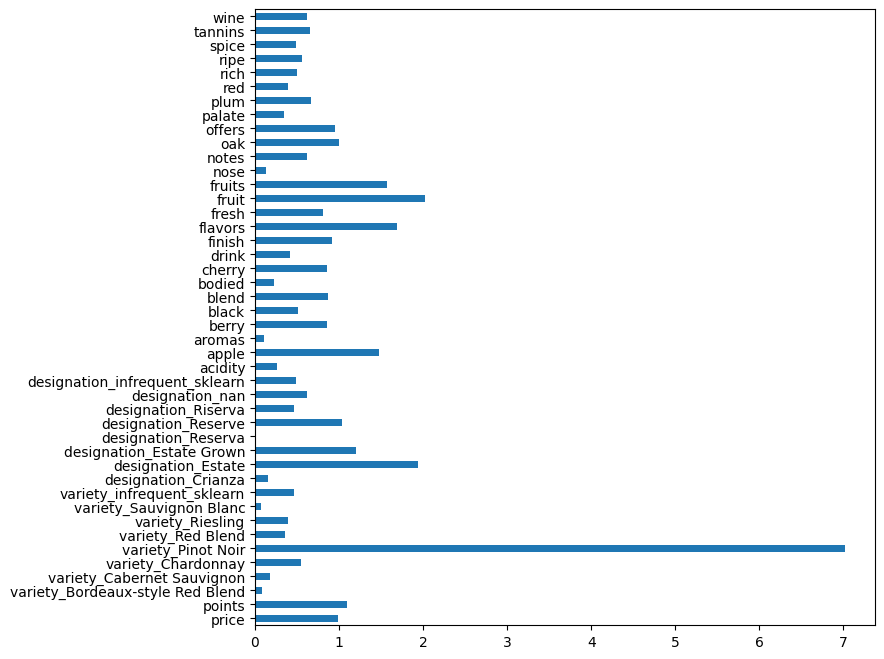

In [271]:
plt.figure(figsize=(8,8))
interpet_model['odds ratio'].plot(kind = 'barh')
plt.show();


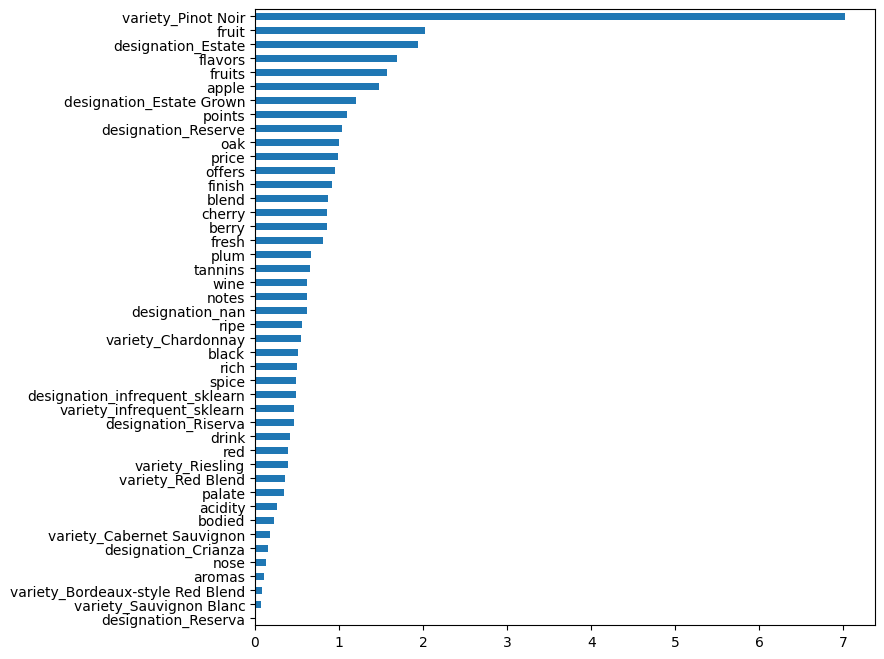

In [273]:
plt.figure(figsize=(8,8))
interpet_model['odds ratio'].sort_values().plot(kind = 'barh')
plt.show();


## Exercise

Make the transformations and merges needed to compute the confusion matrix on the test data. Maybe also accuracy and kappa statistic.

Does your model improve if you use only the several best features?

#### Solution is here, but give it a stab without looking please

In [274]:
descriptions_test_enc = pd.DataFrame(vectorizer.transform(X_test['description']).toarray(), columns = vectorizer.get_feature_names_out(), 
                               index = X_test.index)

In [275]:
variety_test_enc = pd.DataFrame(encoder.transform(X_test[['variety', 'designation']]).toarray(),
                           columns = encoder.get_feature_names_out(), index = X_test.index)

In [276]:
X_test_enc = X_test[['price', 'points']].merge(variety_test_enc, left_index = True, right_index = True)
X_test_enc = X_test_enc.merge(descriptions_test_enc, left_index = True, right_index = True)

In [277]:
y_pred = is_OR_model.predict(X_test_enc)

In [280]:
y_pred

array([False, False, False, ..., False, False, False])

In [278]:
sum(y_pred == y_test) / len(y_test)

0.9532359640895083

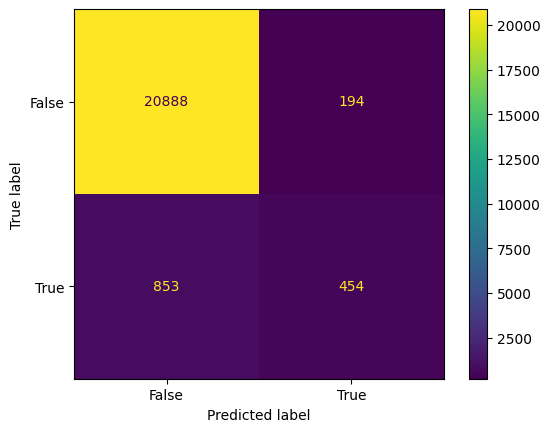

In [279]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=is_OR_model.classes_).plot()

### ROC Curves

ROC curves and the area under the ROC curves (ROC AUC) measure how well a model rank-orders the data.

In [281]:
y_pred


array([False, False, False, ..., False, False, False])

In [282]:
is_OR_model.predict_proba(X_test_enc)

array([[0.98481959, 0.01518041],
       [0.98537674, 0.01462326],
       [0.99802734, 0.00197266],
       ...,
       [0.99717547, 0.00282453],
       [0.9987836 , 0.0012164 ],
       [0.99442201, 0.00557799]])

In [283]:
is_OR_model.predict_proba(X_test_enc)[:,1]

array([0.01518041, 0.01462326, 0.00197266, ..., 0.00282453, 0.0012164 ,
       0.00557799])

In [284]:
y_pred_proba = is_OR_model.predict_proba(X_test_enc)

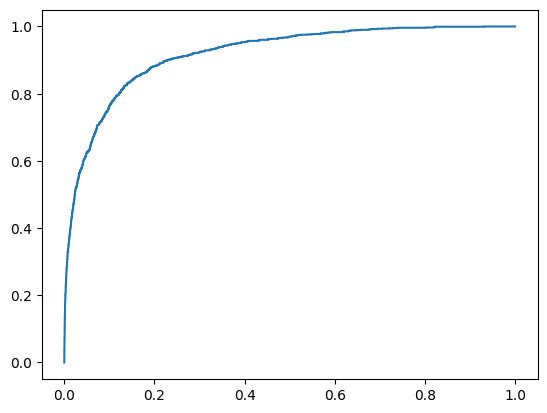

In [285]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_proba[:,1])
plt.plot(fpr, tpr)

In [286]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_true=y_test, y_score=y_pred_proba[:,1]))

0.9182250754459199
